___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

## Heart-stroke Prediction

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholesterol in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

## Import Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

## Ingest the data to notebook

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


## EDA (Exploratory Data Analysis and Visualization)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.shape, df.size

((303, 14), 4242)

In [7]:
df.isnull().sum().sum()

0

In [8]:
df.duplicated().sum()

1

In [9]:
df[df.duplicated(keep=False)==True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.000,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.000,2,4,2,1


In [10]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [11]:
df.loc[160:170]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
160,56,1,1,120,240,0,1,169,0,0.000,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.200,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.000,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.000,2,4,2,1
164,67,1,0,160,286,0,0,108,1,1.500,1,3,2,0
165,67,1,0,120,229,0,0,129,1,2.600,1,2,3,0
166,62,0,0,140,268,0,0,160,0,3.600,0,2,2,0
167,63,1,0,130,254,0,0,147,0,1.400,1,1,3,0
168,53,1,0,140,203,1,0,155,1,3.100,0,0,3,0
169,56,1,2,130,256,1,0,142,1,0.600,1,1,1,0


In [12]:
for col in df.columns:
    values = df[col].nunique()
    print(f'{col:<10}: {values}')

age       : 41
sex       : 2
cp        : 4
trestbps  : 49
chol      : 152
fbs       : 2
restecg   : 3
thalach   : 91
exang     : 2
oldpeak   : 40
slope     : 3
ca        : 5
thal      : 4
target    : 2


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.000,54.421,9.048,29.000,48.000,55.500,61.000,77.000
sex,302.000,0.682,0.466,0.000,0.000,1.000,1.000,1.000
cp,302.000,0.964,1.032,0.000,0.000,1.000,2.000,3.000
trestbps,302.000,131.603,17.563,94.000,120.000,130.000,140.000,200.000
chol,302.000,246.500,51.753,126.000,211.000,240.500,274.750,564.000
fbs,302.000,0.149,0.357,0.000,0.000,0.000,0.000,1.000
restecg,302.000,0.526,0.526,0.000,0.000,1.000,1.000,2.000
thalach,302.000,149.570,22.904,71.000,133.250,152.500,166.000,202.000
exang,302.000,0.328,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,302.000,1.043,1.161,0.000,0.000,0.800,1.600,6.200


***nominal/ordinal type columns (with 3 or more values)***

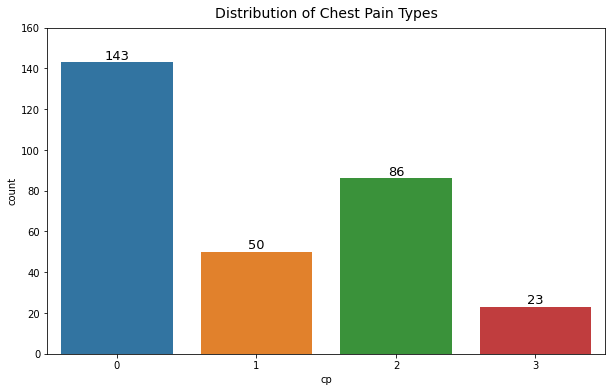

In [14]:
a = sns.countplot(data=df, x='cp')
a.bar_label(a.containers[0], fontsize=13), plt.ylim(0, 160)
plt.title('Distribution of Chest Pain Types', pad=10, fontsize=14);

In [15]:
# (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | 
# Value 3: asymptomatic

df['cp']=df['cp'].replace({0:'typical angina', 1:'atypical angina', 2:'non-anginal pain',3:'asymptomatic'})

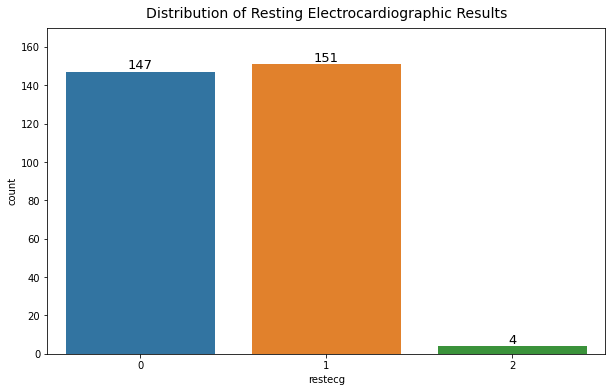

In [16]:
a = sns.countplot(data=df, x='restecg')
a.bar_label(a.containers[0], fontsize=13), plt.ylim(0, 170)
plt.title('Distribution of Resting Electrocardiographic Results', pad=10, fontsize=14);

In [17]:
# (restecg): resting electrocardiographic results | Value 0: normal | 
# Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | 
# Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

df['restecg']=df['restecg'].replace({0:'normal',1:'having ST-T wave abnormality',2:'left ventricular hypertrophy'})

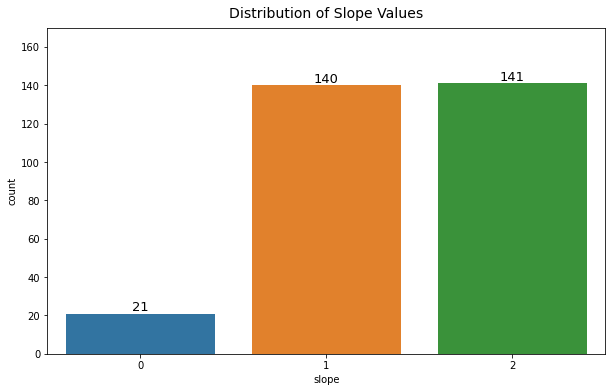

In [18]:
a = sns.countplot(data=df, x='slope')
a.bar_label(a.containers[0], fontsize=13), plt.ylim(0, 170)
plt.title('Distribution of Slope Values', pad=10, fontsize=14);

In [19]:
# (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping
# values don't match the ones in the domain info

df['slope'] = df['slope'].astype(str)

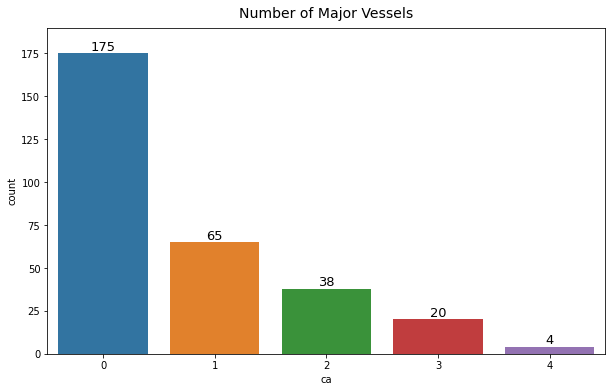

In [20]:
a = sns.countplot(data=df, x='ca')
a.bar_label(a.containers[0], fontsize=13), plt.ylim(0, 190)
plt.title('Number of Major Vessels', pad=10, fontsize=14);

In [21]:
# (ca): number of major vessels (0-3) colored by flourosopy

df[df.ca == 4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,non-anginal pain,138,223,0,having ST-T wave abnormality,169,0,0.000,2,4,2,1
158,58,1,atypical angina,125,220,0,having ST-T wave abnormality,144,0,0.400,1,4,3,1
163,38,1,non-anginal pain,138,175,0,having ST-T wave abnormality,173,0,0.000,2,4,2,1
250,43,1,typical angina,132,247,1,normal,143,1,0.100,1,4,3,0


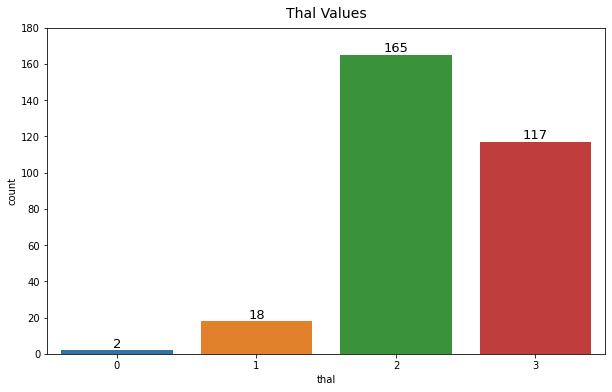

In [22]:
a = sns.countplot(data=df, x='thal')
a.bar_label(a.containers[0], fontsize=13), plt.ylim(0, 180)
plt.title('Thal Values', pad=10, fontsize=14);

In [23]:
# (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect
# # values don't match the ones in the domain info

In [24]:
df.drop(df[df['thal']==0].index, inplace=True)
df.reset_index(drop=True, inplace=True)
df['thal'] = df['thal'].astype(str)

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,asymptomatic,145,233,1,normal,150,0,2.300,0,0,1,1
1,37,1,non-anginal pain,130,250,0,having ST-T wave abnormality,187,0,3.500,0,0,2,1
2,41,0,atypical angina,130,204,0,normal,172,0,1.400,2,0,2,1
3,56,1,atypical angina,120,236,0,having ST-T wave abnormality,178,0,0.800,2,0,2,1
4,57,0,typical angina,120,354,0,having ST-T wave abnormality,163,1,0.600,2,0,2,1


***nominal/ordinal type columns (with 2 values)***

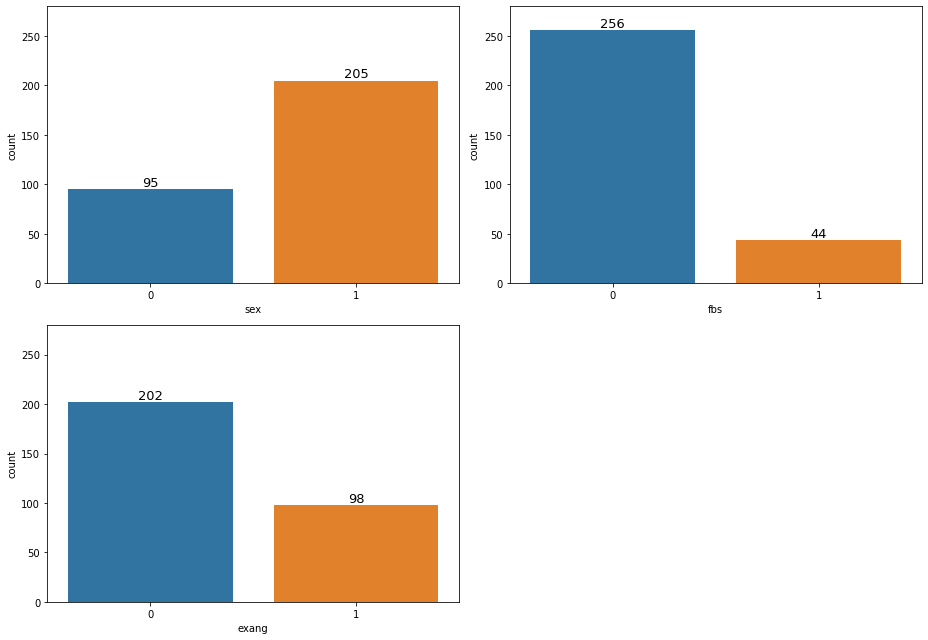

In [26]:
columns = ['sex', 'fbs', 'exang']
index = 0
plt.figure(figsize=(13,9))
for col in columns:    
    index += 1
    plt.subplot(2,2,index)
    a = sns.countplot(data=df, x=col)
    a.bar_label(a.containers[0], fontsize=13), plt.ylim(0, 280)
plt.tight_layout()

# (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
# (exang): exercise induced angina (1 = yes; 0 = no)

***numeric columns***

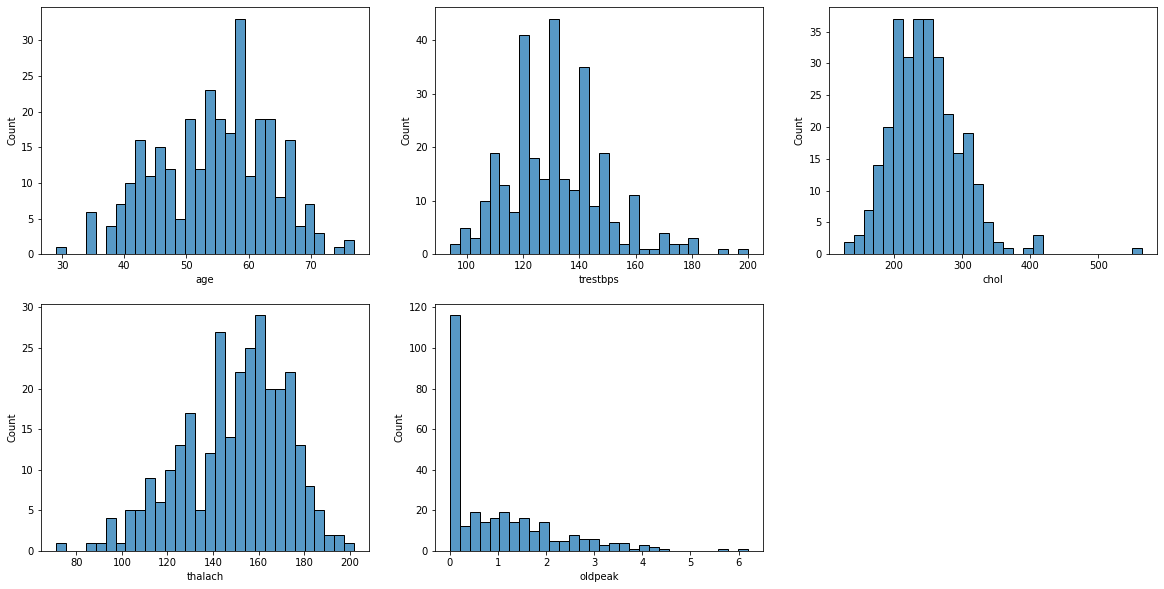

In [27]:
columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
index = 0
plt.figure(figsize=(20,10))
for col in columns:    
    index += 1
    plt.subplot(2,3,index)
    sns.histplot(data=df, x=col, bins=30)

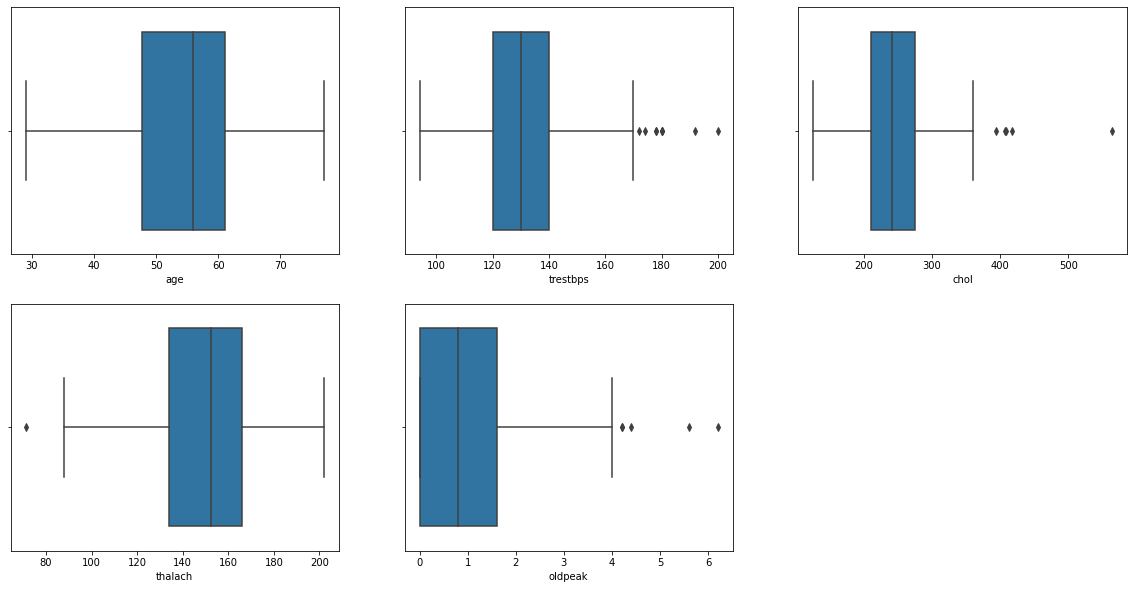

In [28]:
columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
index = 0
plt.figure(figsize=(20,10))
for col in columns:    
    index += 1
    plt.subplot(2,3,index)
    sns.boxplot(data=df, x=col)

In [29]:
df.trestbps.nlargest(10).value_counts()

180    3
178    2
200    1
192    1
174    1
172    1
170    1
Name: trestbps, dtype: int64

In [30]:
df.chol.nlargest(10).value_counts()

564    1
417    1
409    1
407    1
394    1
360    1
354    1
353    1
342    1
341    1
Name: chol, dtype: int64

In [31]:
df.thalach.nsmallest(5).value_counts()

71    1
88    1
90    1
95    1
96    1
Name: thalach, dtype: int64

In [32]:
df[df.chol == 564]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
84,67,0,non-anginal pain,115,564,0,normal,160,0,1.600,1,0,3,1


In [33]:
df.oldpeak.nlargest(10).value_counts()

4.000    3
4.200    2
6.200    1
5.600    1
4.400    1
3.800    1
3.600    1
Name: oldpeak, dtype: int64

***TARGET COLUMN***

In [34]:
df.target.value_counts(), df.target.value_counts(normalize=True)

(1    163
 0    137
 Name: target, dtype: int64,
 1   0.543
 0   0.457
 Name: target, dtype: float64)

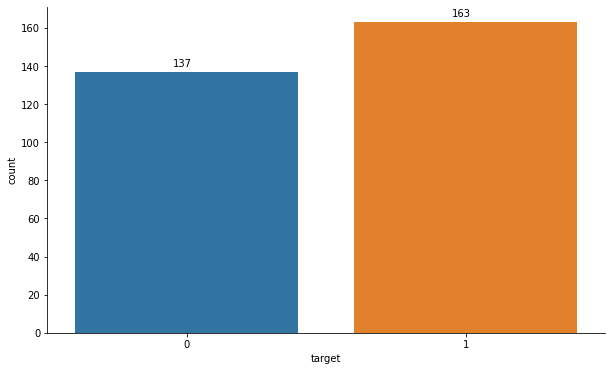

In [35]:
ax = sns.countplot(df['target'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.35, p.get_height()*1.02));

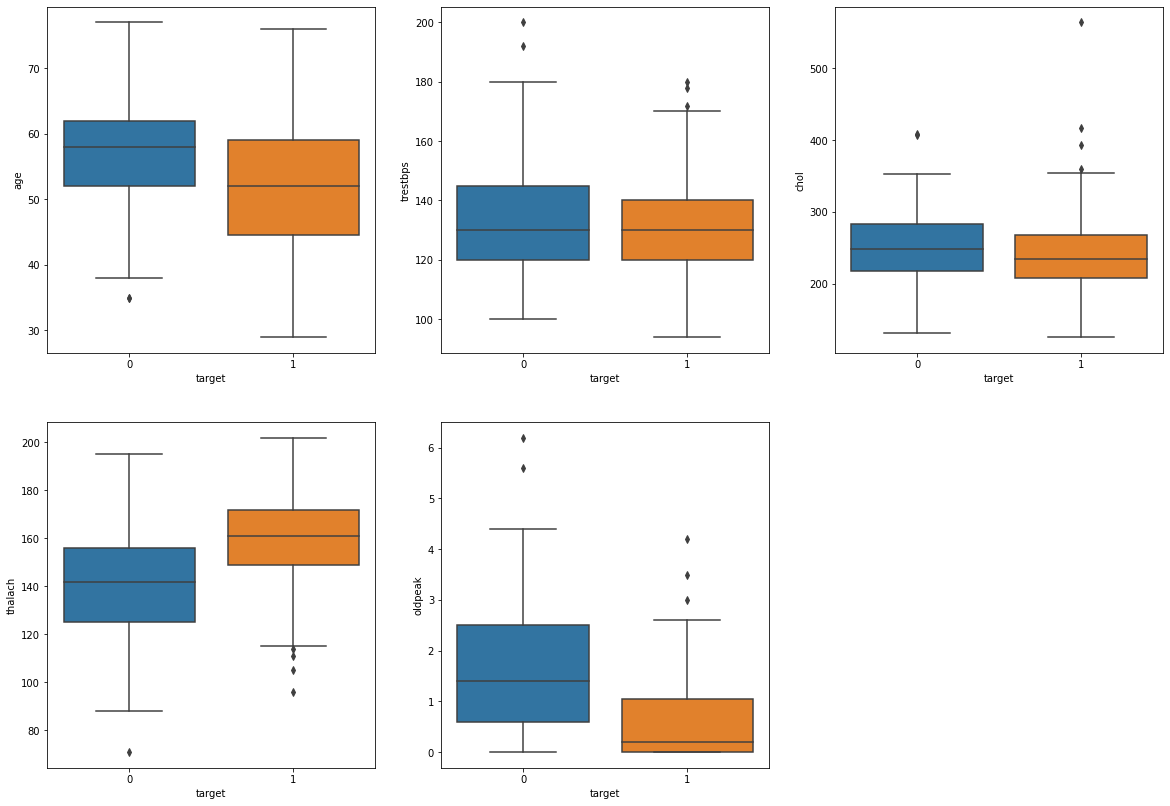

In [36]:
columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
index = 0
plt.figure(figsize=(20,14))
for col in columns:
    index += 1
    plt.subplot(2,3,index)
    sns.boxplot(x='target', y=col, data=df)

***correlations - patterns***

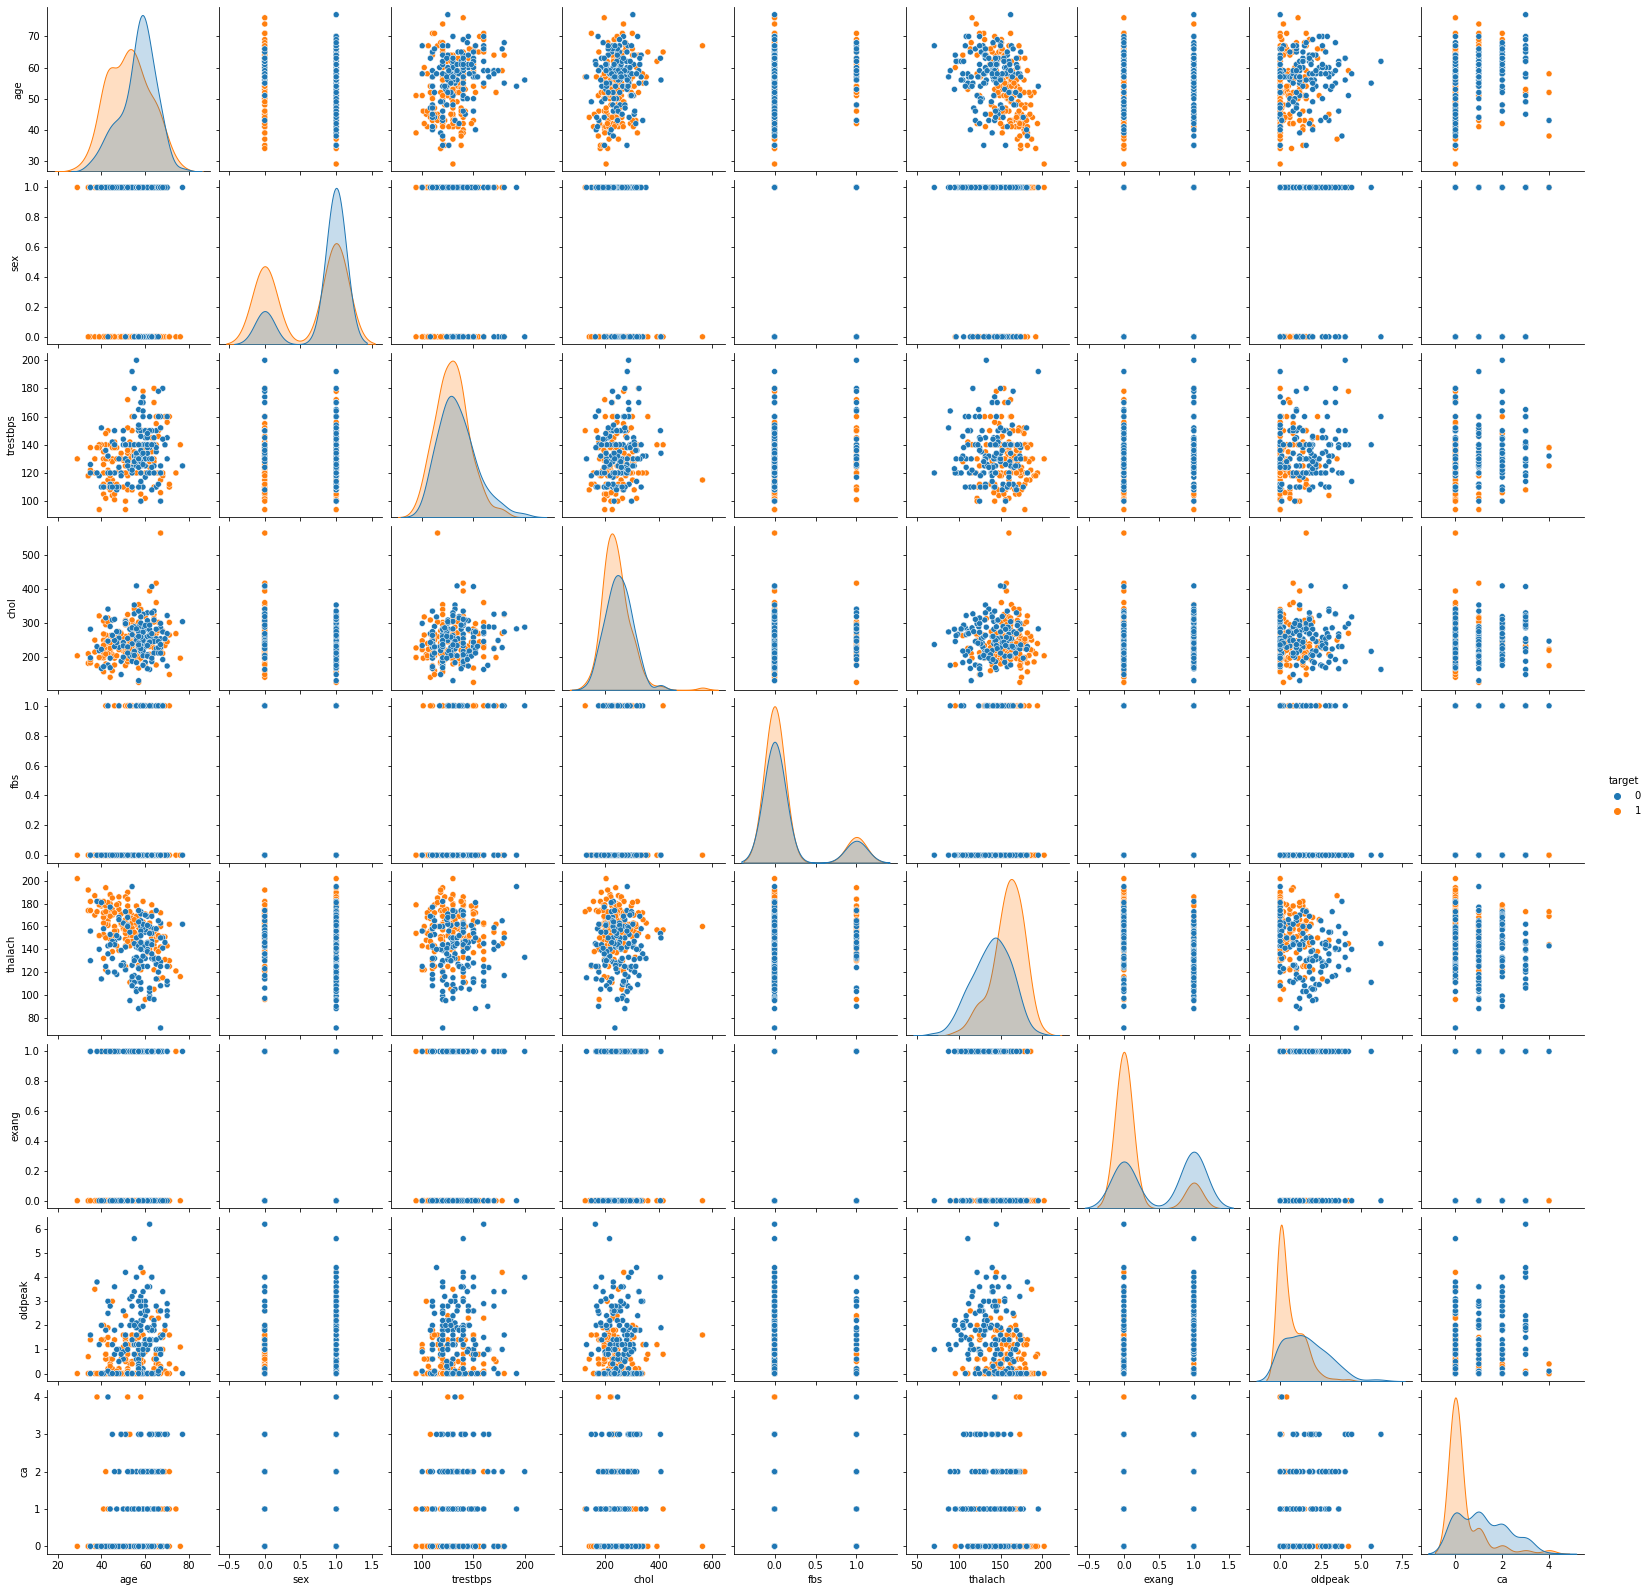

In [37]:
sns.pairplot(df, hue = 'target')

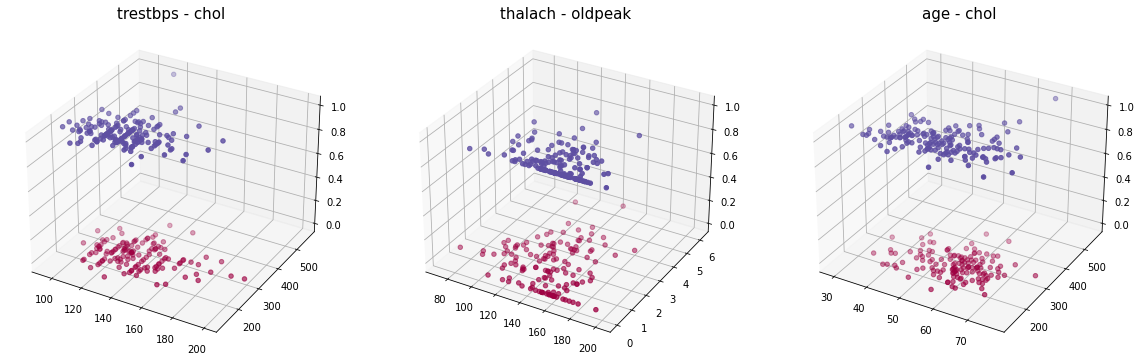

In [38]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(20,10))
color_map = plt.get_cmap('Spectral')

ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(df['trestbps'], df['chol'], df['target'], c=df['target'], cmap = color_map)
ax1.set_title('trestbps - chol', fontsize=15)

ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(df['thalach'], df['oldpeak'], df['target'], c=df['target'], cmap = color_map)
ax2.set_title('thalach - oldpeak', fontsize=15)

ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(df['age'], df['chol'], df['target'], c=df['target'], cmap = color_map)
ax3.set_title('age - chol', fontsize=15);

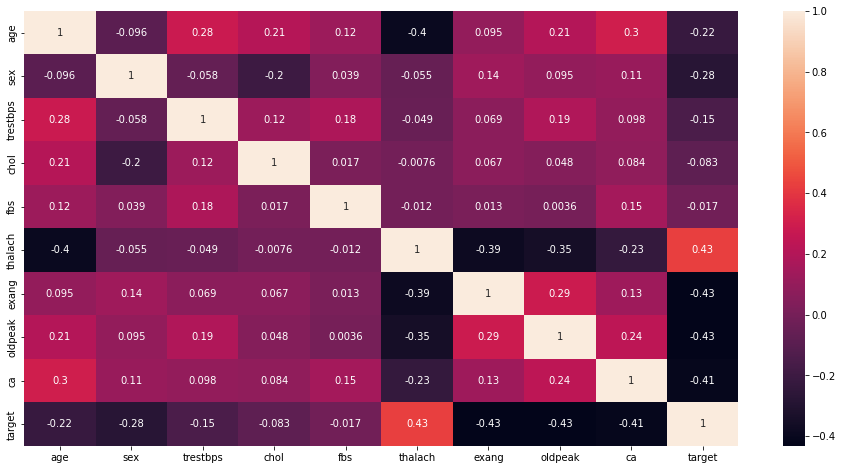

In [39]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True);

<AxesSubplot:>

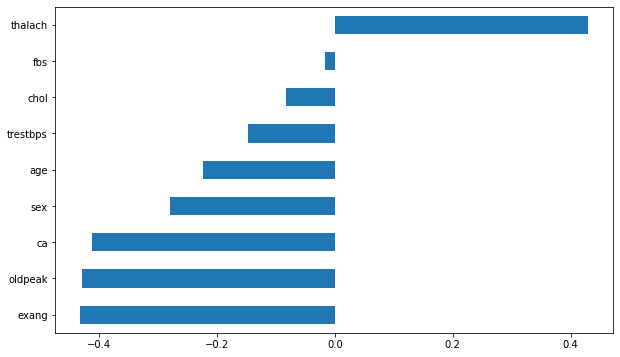

In [40]:
df.corr()['target'].drop('target').sort_values().plot.barh()

## Data Preprocessing
Train | Test Split and Scaling

In [41]:
df=pd.get_dummies(df,drop_first=True)
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_atypical angina,cp_non-anginal pain,cp_typical angina,restecg_left ventricular hypertrophy,restecg_normal,slope_1,slope_2,thal_2,thal_3
0,63,1,145,233,1,150,0,2.300,0,1,0,0,0,0,1,0,0,0,0
1,37,1,130,250,0,187,0,3.500,0,1,0,1,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.400,0,1,1,0,0,0,1,0,1,1,0
3,56,1,120,236,0,178,0,0.800,0,1,1,0,0,0,0,0,1,1,0
4,57,0,120,354,0,163,1,0.600,0,1,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,57,0,140,241,0,123,1,0.200,0,0,0,0,1,0,0,1,0,0,1
296,45,1,110,264,0,132,0,1.200,0,0,0,0,0,0,0,1,0,0,1
297,68,1,144,193,1,141,0,3.400,2,0,0,0,1,0,0,1,0,0,1
298,57,1,130,131,0,115,1,1.200,1,0,0,0,1,0,0,1,0,0,1


In [42]:
X=df.drop(['target'], axis=1)
y=df['target']

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [45]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (240, 18)
Train target shape   :  (240,)
Test features shape  :  (60, 18)
Test target shape    :  (60,)


In [46]:
scaler = MinMaxScaler()

In [47]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
log_model=LogisticRegression()

In [50]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [51]:
log_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [52]:
y_pred=log_model.predict(X_test_scaled)
y_pred_proba=log_model.predict_proba(X_test_scaled)

In [53]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_atypical angina,...,cp_typical angina,restecg_left ventricular hypertrophy,restecg_normal,slope_1,slope_2,thal_2,thal_3,target,pred,pred_proba
250,62,0,138,294,1,106,0,1.900,3,0,...,1,0,0,1,0,1,0,0,0,0.335
61,52,1,118,186,0,190,0,0.000,0,0,...,0,0,1,1,0,0,0,1,1,0.745
186,50,1,140,233,0,163,0,0.600,1,0,...,0,0,0,1,0,0,1,0,0,0.499
266,54,1,122,286,0,116,1,3.200,2,0,...,1,0,1,1,0,1,0,0,0,0.095
164,67,1,120,229,0,129,1,2.600,2,0,...,1,0,1,1,0,0,1,0,0,0.023
200,58,1,150,270,0,111,1,0.800,0,0,...,1,0,1,0,1,0,1,0,0,0.117
226,59,1,170,288,0,159,0,0.200,0,0,...,0,0,1,1,0,0,1,0,0,0.361
289,58,0,170,225,1,146,1,2.800,2,0,...,1,0,1,1,0,0,0,0,0,0.103
130,49,0,134,271,0,162,0,0.000,0,1,...,0,0,0,1,0,1,0,1,1,0.939
269,61,1,134,234,0,145,0,2.600,2,0,...,0,0,0,1,0,1,0,0,1,0.567


**Model Performance on Classification Tasks**

In [54]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, balanced_accuracy_score

In [55]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [56]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[20  7]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.87      0.74      0.80        27
           1       0.81      0.91      0.86        33

    accuracy                           0.83        60
   macro avg       0.84      0.82      0.83        60
weighted avg       0.84      0.83      0.83        60


Train_Set
[[ 92  18]
 [ 15 115]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       110
           1       0.86      0.88      0.87       130

    accuracy                           0.86       240
   macro avg       0.86      0.86      0.86       240
weighted avg       0.86      0.86      0.86       240



**Cross Validate**

In [57]:
from sklearn.model_selection import cross_validate

In [58]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring=['precision','recall','f1','accuracy'], cv=10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.013,0.004,0.846,0.846,0.846,0.833
2,0.009,0.005,0.611,0.846,0.710,0.625
3,0.012,0.004,0.857,0.923,0.889,0.875
4,0.010,0.004,0.800,0.923,0.857,0.833
5,0.010,0.005,0.857,0.923,0.889,0.875
6,0.011,0.005,0.727,0.615,0.667,0.667
7,0.011,0.004,0.923,0.923,0.923,0.917
8,0.009,0.004,0.909,0.769,0.833,0.833
9,0.012,0.004,1.000,0.923,0.960,0.958
10,0.012,0.005,0.923,0.923,0.923,0.917


In [59]:
df_scores.mean()[2:]

test_precision   0.845
test_recall      0.862
test_f1          0.850
test_accuracy    0.833
dtype: float64

**GridSearchCV**

In [60]:
sklearn.metrics.SCORERS.keys()

<IPython.core.display.Javascript object>

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [61]:
# GridSearch for 'liblinear' solver
# I will try to make '1' class scores better as we want to predict heart strokes

from sklearn.model_selection import GridSearchCV

model=LogisticRegression(solver='liblinear')

penalty = ['l1', 'l2']
C = np.logspace(-1, 5, 20)
class_weight= ['balanced', None] 
l1_ratio = [0.1, 0.3, 0.5, 0.7, 0.9]

param_grid = {"penalty": penalty,
              "C": C,
              "class_weight": class_weight,
              "l1_ratio": l1_ratio}

log_grid_model1 = GridSearchCV(estimator=model,
                               param_grid=param_grid,
                               cv=10, verbose=1,
                               scoring='recall',
                               n_jobs=-1).fit(X_train_scaled,y_train)

print('\n', log_grid_model1.best_params_)
print('\n', log_grid_model1.best_score_)
print('\n', log_grid_model1.best_estimator_)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits

 {'C': 0.8858667904100825, 'class_weight': None, 'l1_ratio': 0.1, 'penalty': 'l1'}

 0.8692307692307691

 LogisticRegression(C=0.8858667904100825, l1_ratio=0.1, penalty='l1',
                   solver='liblinear')


In [62]:
eval_metric(log_grid_model1, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[20  7]
 [ 4 29]]
              precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.81      0.88      0.84        33

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.81        60
weighted avg       0.82      0.82      0.82        60


Train_Set
[[ 91  19]
 [ 15 115]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       110
           1       0.86      0.88      0.87       130

    accuracy                           0.86       240
   macro avg       0.86      0.86      0.86       240
weighted avg       0.86      0.86      0.86       240



In [63]:
# GridSearch for other solvers

model=LogisticRegression()

C = np.logspace(-1, 5, 20)

param_grid = [
        {'solver': ['lbfgs', 'sag', 'newton-cg'], 'penalty': ['l2', 'none'], 'class_weight': ['balanced', None], 'C': C},
        {'solver': ['saga'], 'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'class_weight': ['balanced', None],
         'l1_ratio': [0.2, 0.5, 0.8], 'C': C}
]

log_grid_model2 = GridSearchCV(estimator=model, param_grid=param_grid, verbose=1,
                                  scoring='recall', cv=10, n_jobs=-1).fit(X_train_scaled,y_train)

print('\n', log_grid_model2.best_params_)
print('\n', log_grid_model2.best_score_)
print('\n', log_grid_model2.best_estimator_)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits

 {'C': 0.8858667904100825, 'class_weight': None, 'l1_ratio': 0.2, 'penalty': 'l1', 'solver': 'saga'}

 0.876923076923077

 LogisticRegression(C=0.8858667904100825, l1_ratio=0.2, penalty='l1',
                   solver='saga')


In [64]:
eval_metric(log_grid_model2, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[18  9]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.86      0.67      0.75        27
           1       0.77      0.91      0.83        33

    accuracy                           0.80        60
   macro avg       0.81      0.79      0.79        60
weighted avg       0.81      0.80      0.80        60


Train_Set
[[ 90  20]
 [ 14 116]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       110
           1       0.85      0.89      0.87       130

    accuracy                           0.86       240
   macro avg       0.86      0.86      0.86       240
weighted avg       0.86      0.86      0.86       240



**ROC (Receiver Operating Curve) and AUC (Area Under Curve)**

In [65]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve

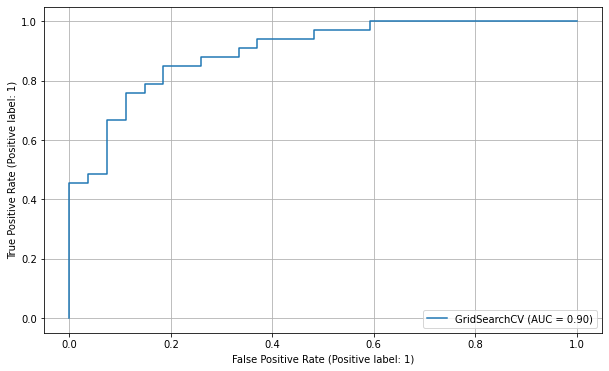

In [66]:
plot_roc_curve(log_grid_model2, X_test_scaled, y_test)
plt.grid(visible=True);

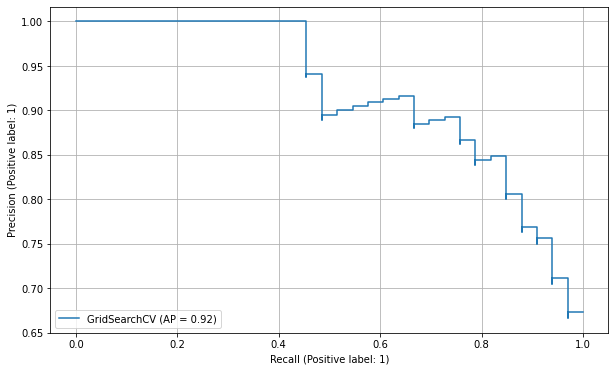

In [67]:
plot_precision_recall_curve(log_grid_model2, X_test_scaled, y_test)
plt.grid(visible=True);

**Finding Best Threshold for max recall score**

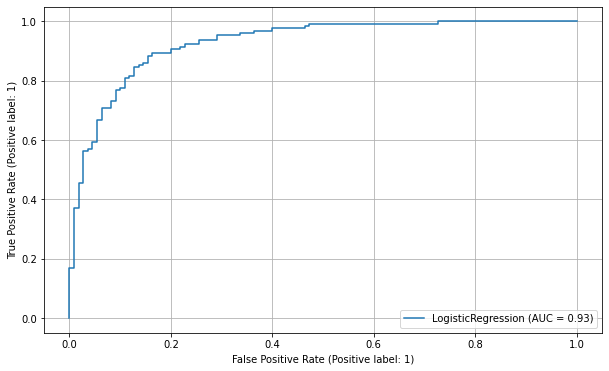

In [68]:
plot_roc_curve(log_model, X_train_scaled, y_train)
plt.grid(visible=True);

In [69]:
y_pred_proba = log_model.predict_proba(X_train_scaled)
roc_auc_score(y_train, y_pred_proba[:,1])

0.9282517482517483

In [70]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [71]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5035922905785505

In [72]:
y_pred2 = pd.Series(log_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x: 1 if x >= optimal_threshold else 0)
y_pred3 = pd.Series(log_grid_model2.predict_proba(X_test_scaled)[:,1]).apply(lambda x: 1 if x >= optimal_threshold else 0)

In [73]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[20  7]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.87      0.74      0.80        27
           1       0.81      0.91      0.86        33

    accuracy                           0.83        60
   macro avg       0.84      0.82      0.83        60
weighted avg       0.84      0.83      0.83        60



In [74]:
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[18  9]
 [ 4 29]]
              precision    recall  f1-score   support

           0       0.82      0.67      0.73        27
           1       0.76      0.88      0.82        33

    accuracy                           0.78        60
   macro avg       0.79      0.77      0.78        60
weighted avg       0.79      0.78      0.78        60



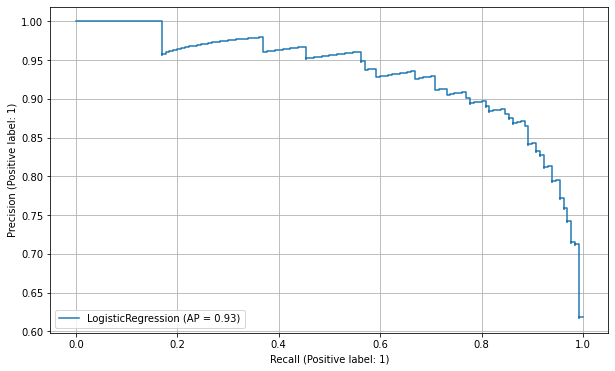

In [75]:
plot_precision_recall_curve(log_model, X_train_scaled, y_train)
plt.grid(visible=True);

In [76]:
y_pred_proba = log_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

0.9329516815145242

In [77]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [78]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.4986882482336392

In [79]:
y_pred2 = pd.Series(log_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x: 1 if x >= optimal_threshold else 0)
y_pred3 = pd.Series(log_grid_model2.predict_proba(X_test_scaled)[:,1]).apply(lambda x: 1 if x >= optimal_threshold else 0)

In [80]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[19  8]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.86      0.70      0.78        27
           1       0.79      0.91      0.85        33

    accuracy                           0.82        60
   macro avg       0.83      0.81      0.81        60
weighted avg       0.82      0.82      0.81        60



In [81]:
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[18  9]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.86      0.67      0.75        27
           1       0.77      0.91      0.83        33

    accuracy                           0.80        60
   macro avg       0.81      0.79      0.79        60
weighted avg       0.81      0.80      0.80        60



In [82]:
# Cross Validation for Best Threshold
from sklearn.model_selection import StratifiedKFold

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [83]:
model1 = LogisticRegression()
CV(10, model1, pd.DataFrame(X_train_scaled), y_train, optimal_threshold)

Accuracy      83.33%  std 7.22%
Precision-1   85.09%  std 5.86%
Recall-1      84.62%  std 13.32%
F1_score-1    84.14%  std 8.01%


In [84]:
model2 = LogisticRegression(C=0.8858667904100825, l1_ratio=0.2, penalty='l1',solver='saga')
CV(10, model2, pd.DataFrame(X_train_scaled), y_train, optimal_threshold)

Accuracy      83.33%  std 7.91%
Precision-1   84.19%  std 7.62%
Recall-1      86.15%  std 11.31%
F1_score-1    84.64%  std 7.50%


***

## Implement KNN and Evaluate

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
knn_model = KNeighborsClassifier()

In [87]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [88]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [89]:
y_pred=knn_model.predict(X_test_scaled)
y_pred_proba=knn_model.predict_proba(X_test_scaled)

In [90]:
test_data["pred2"] = y_pred
test_data["pred_proba2"] = y_pred_proba[:,1]
test_data.sample(10)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_atypical angina,...,restecg_normal,slope_1,slope_2,thal_2,thal_3,target,pred,pred_proba,pred2,pred_proba2
134,49,0,130,269,0,163,0,0.000,0,0,...,0,0,1,1,0,1,1,0.905,1,1.000
149,66,1,160,228,0,138,0,2.300,0,0,...,1,0,1,0,0,1,0,0.338,0,0.400
83,42,0,102,265,0,122,0,0.600,0,0,...,1,1,0,1,0,1,1,0.735,1,1.000
44,39,1,140,321,0,182,0,0.000,0,0,...,1,0,1,1,0,1,1,0.937,1,1.000
226,59,1,170,288,0,159,0,0.200,0,0,...,1,1,0,0,1,0,0,0.361,0,0.400
215,63,1,130,330,1,132,1,1.800,3,0,...,1,0,1,0,1,0,0,0.035,0,0.000
299,57,0,130,236,0,174,0,0.000,1,1,...,1,1,0,1,0,0,1,0.881,1,0.800
186,50,1,140,233,0,163,0,0.600,1,0,...,0,1,0,0,1,0,0,0.499,0,0.200
43,53,0,130,264,0,143,0,0.400,0,0,...,1,1,0,1,0,1,1,0.712,1,1.000
165,62,0,140,268,0,160,0,3.600,2,0,...,1,0,0,1,0,0,0,0.357,1,0.800


**Model Performance on Classification Tasks**

In [91]:
eval_metric(knn_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[19  8]
 [ 2 31]]
              precision    recall  f1-score   support

           0       0.90      0.70      0.79        27
           1       0.79      0.94      0.86        33

    accuracy                           0.83        60
   macro avg       0.85      0.82      0.83        60
weighted avg       0.84      0.83      0.83        60


Train_Set
[[ 93  17]
 [ 20 110]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.87      0.85      0.86       130

    accuracy                           0.85       240
   macro avg       0.84      0.85      0.85       240
weighted avg       0.85      0.85      0.85       240



**Cross Validate**

In [92]:
model = KNeighborsClassifier()

scores = cross_validate(model, X_train_scaled, y_train, scoring=['precision','recall','f1','accuracy'], cv=10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.001,0.006,0.846,0.846,0.846,0.833
2,0.001,0.007,0.733,0.846,0.786,0.750
3,0.002,0.006,0.846,0.846,0.846,0.833
4,0.001,0.006,0.786,0.846,0.815,0.792
5,0.001,0.006,0.800,0.615,0.696,0.708
6,0.001,0.007,0.727,0.615,0.667,0.667
7,0.002,0.006,0.917,0.846,0.880,0.875
8,0.001,0.006,0.833,0.769,0.800,0.792
9,0.001,0.007,0.917,0.846,0.880,0.875
10,0.001,0.007,1.000,0.923,0.960,0.958


In [93]:
df_scores.mean()[2:]

test_precision   0.841
test_recall      0.800
test_f1          0.818
test_accuracy    0.808
dtype: float64

**Elbow Method for Choosing Reasonable K Values**

In [94]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - recall_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

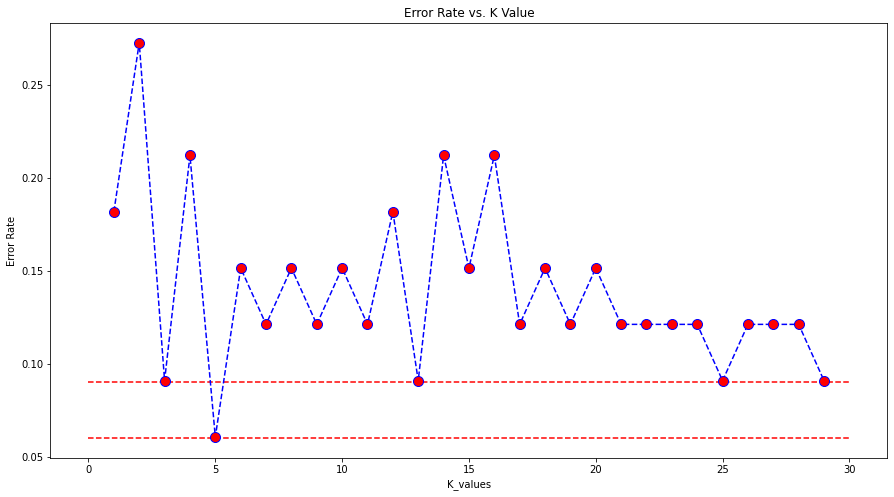

In [95]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.09, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.06, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

In [96]:
# for elbow method default value is the reasonable value

**Scores by Various K Values**

In [97]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled,y_train)
print('WITH K=5\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=5

Test_Set
[[19  8]
 [ 2 31]]
              precision    recall  f1-score   support

           0       0.90      0.70      0.79        27
           1       0.79      0.94      0.86        33

    accuracy                           0.83        60
   macro avg       0.85      0.82      0.83        60
weighted avg       0.84      0.83      0.83        60


Train_Set
[[ 93  17]
 [ 20 110]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.87      0.85      0.86       130

    accuracy                           0.85       240
   macro avg       0.84      0.85      0.85       240
weighted avg       0.85      0.85      0.85       240



In [98]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_scaled,y_train)
print('WITH K=3\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=3

Test_Set
[[16 11]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.84      0.59      0.70        27
           1       0.73      0.91      0.81        33

    accuracy                           0.77        60
   macro avg       0.79      0.75      0.75        60
weighted avg       0.78      0.77      0.76        60


Train_Set
[[ 93  17]
 [ 15 115]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       110
           1       0.87      0.88      0.88       130

    accuracy                           0.87       240
   macro avg       0.87      0.87      0.87       240
weighted avg       0.87      0.87      0.87       240



**Cross Validate For Optimal K Value**

In [99]:
from sklearn.model_selection import cross_val_score, cross_validate

In [100]:
model = KNeighborsClassifier(n_neighbors=5)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy','precision','recall','f1'], cv=10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.002,0.006,0.833,0.846,0.846,0.846
2,0.001,0.006,0.750,0.733,0.846,0.786
3,0.001,0.006,0.833,0.846,0.846,0.846
4,0.001,0.006,0.792,0.786,0.846,0.815
5,0.001,0.006,0.708,0.800,0.615,0.696
6,0.001,0.006,0.667,0.727,0.615,0.667
7,0.001,0.006,0.875,0.917,0.846,0.880
8,0.002,0.005,0.792,0.833,0.769,0.800
9,0.001,0.006,0.875,0.917,0.846,0.880
10,0.001,0.006,0.958,1.000,0.923,0.960


In [101]:
df_scores.mean()[2:]

test_accuracy    0.808
test_precision   0.841
test_recall      0.800
test_f1          0.818
dtype: float64

**Gridsearch Method for Choosing Reasonable K Values**

In [102]:
# Grid Search
knn_grid = KNeighborsClassifier()

k_values = range(1,30)
param_grid = {'n_neighbors':k_values, 'p':[1,2], 'weights':['uniform', 'distance'], 'leaf_size': [20, 25, 30, 35]}

knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'recall', verbose=1, n_jobs=-1).fit(X_train_scaled,y_train)

print('\n', knn_grid_model.best_params_)
print('\n', knn_grid_model.best_score_)
print('\n', knn_grid_model.best_estimator_)

Fitting 10 folds for each of 464 candidates, totalling 4640 fits

 {'leaf_size': 20, 'n_neighbors': 25, 'p': 2, 'weights': 'distance'}

 0.8615384615384617

 KNeighborsClassifier(leaf_size=20, n_neighbors=25, weights='distance')


In [103]:
print('WITH K=25\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=25

Test_Set
[[18  9]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.86      0.67      0.75        27
           1       0.77      0.91      0.83        33

    accuracy                           0.80        60
   macro avg       0.81      0.79      0.79        60
weighted avg       0.81      0.80      0.80        60


Train_Set
[[110   0]
 [  0 130]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       130

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



**Evaluating ROC Curves and AUC**

In [104]:
knn_model = KNeighborsClassifier(n_neighbors=5).fit(X_train_scaled, y_train)

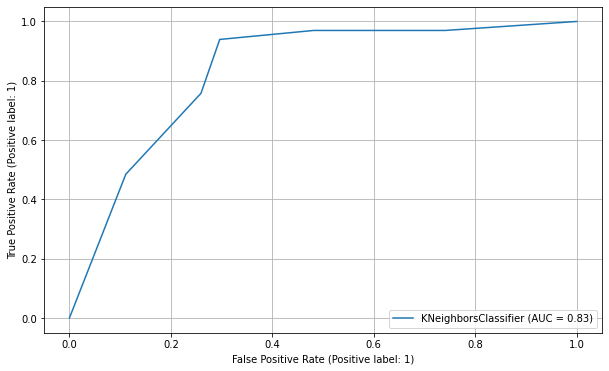

In [105]:
plot_roc_curve(knn_model, X_test_scaled, y_test)
plt.grid(visible=True)

In [106]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.8338945005611673

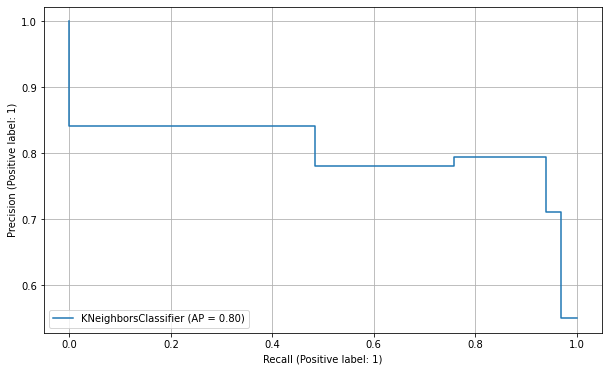

In [107]:
plot_precision_recall_curve(knn_model, X_test_scaled, y_test)
plt.grid(visible=True)

In [108]:
y_pred_proba = knn_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

0.9386592764705309

***

## Visually comparing models based on the chosen metrics

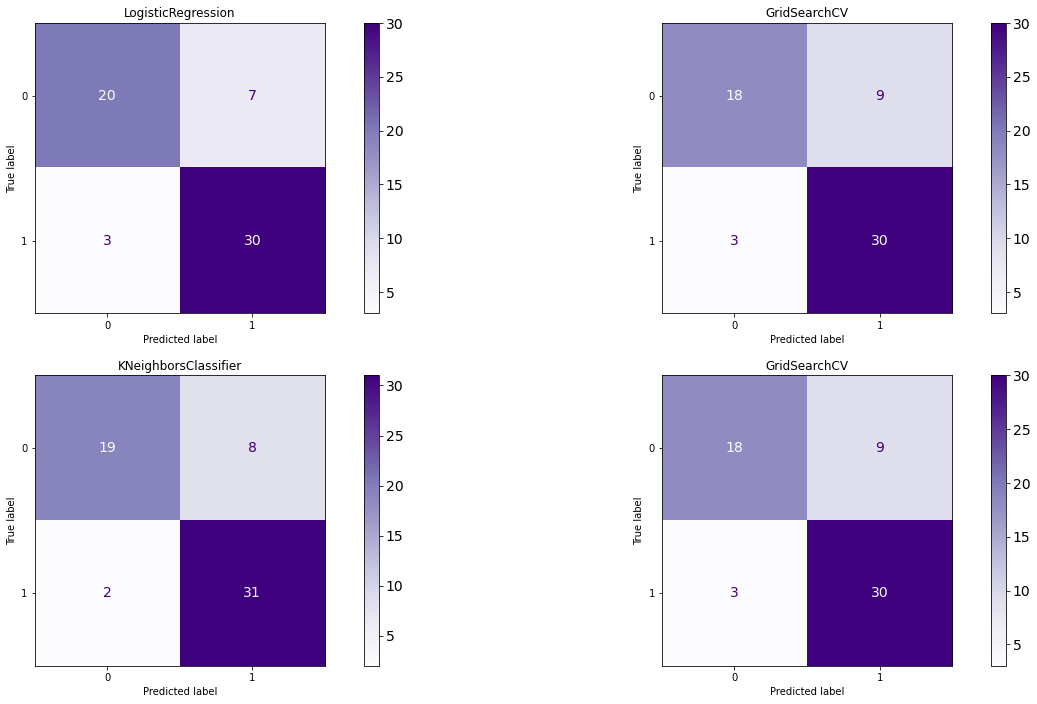

In [109]:
fig, axes = plt.subplots(2,2, figsize=(20,10))
plt.rcParams.update({'font.size': 14})

classifiers = [log_model, log_grid_model2, knn_model, knn_grid_model]
for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, X_test_scaled, y_test, cmap=plt.cm.Purples, ax=ax)
    ax.grid(False)
    ax.title.set_text(type(cls).__name__)

plt.tight_layout()
plt.show()

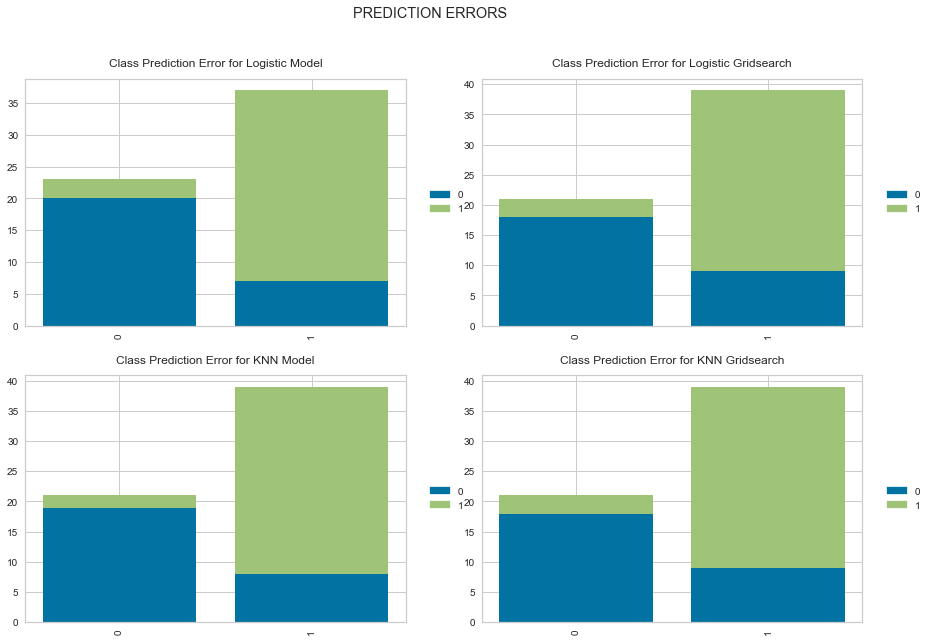

In [110]:
from yellowbrick.classifier import ClassPredictionError

plt.figure(figsize=(15,10))
fig.tight_layout()

plt.subplot(221)
visualizer = ClassPredictionError(log_model).fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test), plt.title('Class Prediction Error for Logistic Model', pad=12) 

plt.subplot(222)
visualizer = ClassPredictionError(log_grid_model2).fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test), plt.title('Class Prediction Error for Logistic Gridsearch', pad=12) 

plt.subplot(223)
visualizer = ClassPredictionError(knn_model).fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test), plt.title('Class Prediction Error for KNN Model', pad=12)

plt.subplot(224)
visualizer = ClassPredictionError(knn_grid_model).fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test), plt.title('Class Prediction Error for KNN Gridsearch', pad=12)

plt.suptitle('PREDICTION ERRORS');

In [111]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[20  7]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.87      0.74      0.80        27
           1       0.81      0.91      0.86        33

    accuracy                           0.83        60
   macro avg       0.84      0.82      0.83        60
weighted avg       0.84      0.83      0.83        60


Train_Set
[[ 92  18]
 [ 15 115]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       110
           1       0.86      0.88      0.87       130

    accuracy                           0.86       240
   macro avg       0.86      0.86      0.86       240
weighted avg       0.86      0.86      0.86       240



In [112]:
eval_metric(log_grid_model2, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[18  9]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.86      0.67      0.75        27
           1       0.77      0.91      0.83        33

    accuracy                           0.80        60
   macro avg       0.81      0.79      0.79        60
weighted avg       0.81      0.80      0.80        60


Train_Set
[[ 90  20]
 [ 14 116]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       110
           1       0.85      0.89      0.87       130

    accuracy                           0.86       240
   macro avg       0.86      0.86      0.86       240
weighted avg       0.86      0.86      0.86       240



In [113]:
eval_metric(knn_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[19  8]
 [ 2 31]]
              precision    recall  f1-score   support

           0       0.90      0.70      0.79        27
           1       0.79      0.94      0.86        33

    accuracy                           0.83        60
   macro avg       0.85      0.82      0.83        60
weighted avg       0.84      0.83      0.83        60


Train_Set
[[ 93  17]
 [ 20 110]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.87      0.85      0.86       130

    accuracy                           0.85       240
   macro avg       0.84      0.85      0.85       240
weighted avg       0.85      0.85      0.85       240



In [114]:
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[18  9]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.86      0.67      0.75        27
           1       0.77      0.91      0.83        33

    accuracy                           0.80        60
   macro avg       0.81      0.79      0.79        60
weighted avg       0.81      0.80      0.80        60


Train_Set
[[110   0]
 [  0 130]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       130

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



***

## Choosing the best model and making a random prediction

In [115]:
scaler = MinMaxScaler().fit(X)

In [116]:
import pickle
pickle.dump(scaler, open("scaler_heart", 'wb'))

In [117]:
X_scaled = scaler.transform(X)

In [118]:
# considering cross-validation recall scores of each model
final_model = LogisticRegression().fit(X_scaled, y)

In [119]:
pickle.dump(final_model, open("final_model_heart", 'wb'))

In [120]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,300.000,54.433,9.077,29.000,47.750,56.000,61.000,77.000
sex,300.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
trestbps,300.000,131.627,17.620,94.000,120.000,130.000,140.000,200.000
chol,300.000,246.743,51.838,126.000,211.000,241.500,275.000,564.000
fbs,300.000,0.147,0.354,0.000,0.000,0.000,0.000,1.000
thalach,300.000,149.663,22.890,71.000,133.750,152.500,166.000,202.000
exang,300.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,300.000,1.047,1.164,0.000,0.000,0.800,1.600,6.200
ca,300.000,0.723,1.008,0.000,0.000,0.000,1.000,4.000
cp_atypical angina,300.000,0.167,0.373,0.000,0.000,0.000,0.000,1.000


In [121]:
my_dict = {"age": [30, 36, 44, 50, 61],
           "sex": [0, 1, 1, 0, 1],
           "trestbps": [112, 135, 140, 158, 180],
           "chol": [150, 170, 222, 314, 480],
           "fbs": [1, 1, 0, 1, 0],
           "thalach": [88, 102, 113, 160, 184],
           "exang": [0, 1, 0, 1, 0],
           "oldpeak": [0.8, 1.0, 4.4, 4.8, 5.2],
           "ca": [1, 3, 3, 0, 2],
           "cp_atypical angina": [1, 1, 1, 0, 0],
           "cp_non-anginal pain": [0, 0, 0, 0, 1],
           "cp_typical angina": [0, 0, 0, 1, 0],
           "restecg_left ventricular hypertrophy": [1, 0, 1, 0, 0],
           "restecg_normal": [0, 0, 0, 1, 1],
           "slope_1": [1, 1, 0, 0, 0],
           "slope_2": [0, 0, 1, 1, 0],
           "thal_2": [0, 1, 1, 0, 0],
           "thal_3": [1, 0, 0, 1, 0]
          }

In [122]:
sample = pd.DataFrame(my_dict)
sample

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_atypical angina,cp_non-anginal pain,cp_typical angina,restecg_left ventricular hypertrophy,restecg_normal,slope_1,slope_2,thal_2,thal_3
0,30,0,112,150,1,88,0,0.800,1,1,0,0,1,0,1,0,0,1
1,36,1,135,170,1,102,1,1.000,3,1,0,0,0,0,1,0,1,0
2,44,1,140,222,0,113,0,4.400,3,1,0,0,1,0,0,1,1,0
3,50,0,158,314,1,160,1,4.800,0,0,0,1,0,1,0,1,0,1
4,61,1,180,480,0,184,0,5.200,2,0,1,0,0,1,0,0,0,0


In [123]:
scaler_heart = pickle.load(open("scaler_heart", "rb"))

In [124]:
sample_scaled = scaler_heart.transform(sample)
sample_scaled

array([[0.02083333, 0.        , 0.16981132, 0.05479452, 1.        ,
        0.12977099, 0.        , 0.12903226, 0.25      , 1.        ,
        0.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 1.        ],
       [0.14583333, 1.        , 0.38679245, 0.10045662, 1.        ,
        0.23664122, 1.        , 0.16129032, 0.75      , 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        ],
       [0.3125    , 1.        , 0.43396226, 0.21917808, 0.        ,
        0.32061069, 0.        , 0.70967742, 0.75      , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 1.        , 0.        ],
       [0.4375    , 0.        , 0.60377358, 0.42922374, 1.        ,
        0.67938931, 1.        , 0.77419355, 0.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        ],
    

In [125]:
final_model = pickle.load(open("final_model_heart", "rb"))

In [126]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)

In [127]:
sample["pred"] = predictions
sample["pred_proba_0"] = predictions_proba[:,0]
sample["pred_proba_1"] = predictions_proba[:,1]
sample

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_atypical angina,...,cp_typical angina,restecg_left ventricular hypertrophy,restecg_normal,slope_1,slope_2,thal_2,thal_3,pred,pred_proba_0,pred_proba_1
0,30,0,112,150,1,88,0,0.800,1,1,...,0,1,0,1,0,0,1,1,0.446,0.554
1,36,1,135,170,1,102,1,1.000,3,1,...,0,0,0,1,0,1,0,0,0.749,0.251
2,44,1,140,222,0,113,0,4.400,3,1,...,0,1,0,0,1,1,0,0,0.652,0.348
3,50,0,158,314,1,160,1,4.800,0,0,...,1,0,1,0,1,0,1,0,0.787,0.213
4,61,1,180,480,0,184,0,5.200,2,0,...,0,0,1,0,0,0,0,0,0.755,0.245
